# 线性拟合

在神经网络与机器学习的研究领域中，线性回归作为一类基础而核心的数学工具，为理解复杂模型的构建原理提供了重要的切入点。

其本质是通过线性映射建立输入变量与目标变量之间的显式关联，旨在以最小化预测误差为目标优化模型参数。

在神经网络的框架下，线性回归可视为单层神经网络的简化形式，其权重矩阵与偏置向量直接对应网络的可学习参数。

这一模型虽结构简单，却揭示了数据驱动建模的核心范式：通过梯度优化迭代逼近全局最优解。

值得注意的是，现代深度学习中许多复杂的非线性模型均以线性变换为基础构建模块，辅以非线性激活函数实现高阶特征提取。

因此，深入理解线性回归的数学性质与优化机制，不仅为后续探索非线性模型奠定基础，亦有助于揭示机器学习中参数学习与泛化能力的本质联系。

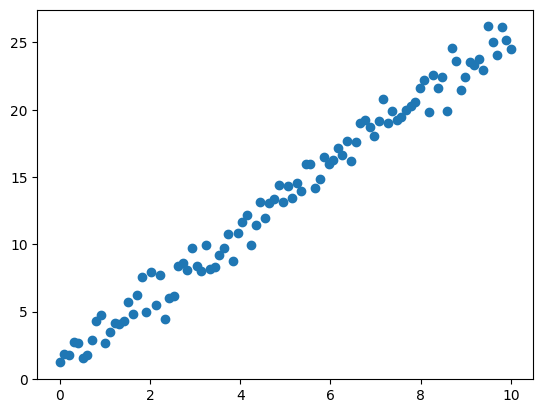

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 自变量
x = np.linspace(0, 10, 100)
# 真实斜率
a_true = 2.5
# 真实截距
b_true = 1.0
# 因变量，加入噪声
y = a_true * x + b_true + np.random.randn(100)

plt.figure()
plt.scatter(x, y, label="Data Points")
plt.show()

# 最小二乘法及其局限性

我们在高中时已经接触过对这种数据进行线性拟合，当时使用的方法是最小二乘法。

数学原理

假设存在一组观测数据点 

(x1,y1),(x2,y2),…,(xn,yn) 目标是找到一条直线 y=a*x+b 使其尽可能贴合这些数据点。

最小二乘法通过以下步骤求解参数 a（斜率）和 b（截距）

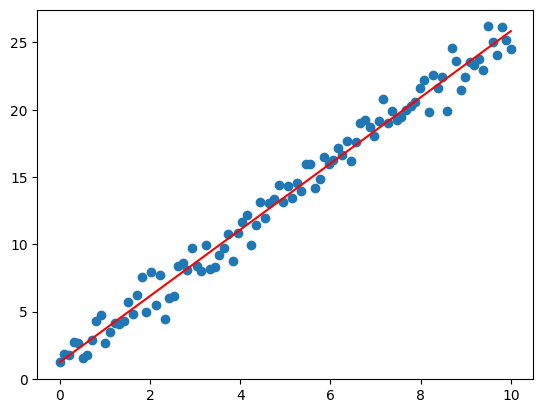

In [2]:
def linear_fit(x: np.ndarray, y: np.ndarray):
    assert len(x) == len(y)
    sigma_x = x.sum()
    sigma_y = y.sum()
    sigma_xx = (x * x).sum()
    sigma_xy = (x * y).sum()
    n = len(x)
    a = (n * sigma_xy - sigma_x * sigma_y) / (n * sigma_xx - sigma_x * sigma_x)
    b = (sigma_y - a * sigma_x) / n
    return a, b


a_hat, b_hat = linear_fit(x, y)

plt.figure()
plt.scatter(x, y, label="Data Points")
plt.plot(x, a_hat * x + b_hat, color="red", label=f"y = {a_hat}*x+{b_hat}")
plt.show()

1. 非线性建模的固有缺陷
   最小二乘法本质是线性模型的最优解搜索工具，其闭合解依赖于线性系统的可解析性。
   而神经网络的强大之处在于通过非线性激活函数（如ReLU、Sigmoid）和分层结构实现复杂的非线性映射。
   这种非线性特性使得模型的损失函数（如均方误差）不再是参数的凸函数，导致无法直接通过最小二乘法的闭合解公式求解全局最优。
2. 高维参数空间的计算不可行性
   最小二乘法的闭合解需要计算矩阵的逆。对于神经网络而言，参数量常达数百万甚至数十亿，甚至三千七百亿（deepseek-r1 371B），对应的矩阵维度极高。
   矩阵求逆的运算复杂度为 O(n^3)，这在时间和内存上均不可行。

在神经网络领域会采用梯度下降法的优化算法


# 梯度下降法：优化问题的核心引擎

梯度下降法（Gradient Descent）是机器学习和数值优化领域中求解函数极值的基础性方法，其本质是通过迭代逼近策略寻找目标函数的极小值点。

在监督学习框架下，模型的训练目标常被定义为最小化损失函数 J(θ)，其中θ为待优化参数。

梯度下降的核心思想源于多元微积分中的方向导数理论：函数的梯度 ∇J(θ) 指向当前点处函数值增长最快的方向，而负梯度方向则是函数值下降最快的路径。

**关键理论特性**

1. 方向最优性
   负梯度方向是当前点处函数值下降最快的方向（一阶泰勒展开视角下），这为参数的局部更新提供了明确的指导。
2. 收敛条件
   在凸函数假设下，适当选择学习率可保证算法收敛至全局最小值；对于非凸函数（如神经网络损失函数），梯度下降通常收敛至局部极小值或鞍点。
3. 学习率的作用
   学习率需权衡收敛速度与稳定性。过大会导致震荡甚至发散，过小则收敛缓慢。

接下来会用梯度下降法求解线性拟合问题，可以看到进行只进行了 5 次回归就达成了很优秀的效果

In [3]:
def linear_fit_BGD(x: np.ndarray, y: np.ndarray, learning_rate: float = 0.01, eval_iters: int = 100):
    # 初始化参数
    a = 0.0
    b = 0.0
    n = len(x)
    lossi = []

    # 执行梯度下降
    for _ in range(eval_iters):
        # 预测值
        y_pred = a * x + b
        # 计算损失 (MSE)
        loss = np.sum((y_pred - y) ** 2) / n
        lossi.append(loss)
        # 计算梯度
        da = (2 / n) * np.sum((y_pred - y) * x)
        db = (2 / n) * np.sum(y_pred - y)
        # 更新参数
        a -= learning_rate * da
        b -= learning_rate * db
    return a, b, lossi

a_hat_BGD, b_hat_BGD, lossi_BGD = linear_fit_BGD(x, y, 0.01, 5)

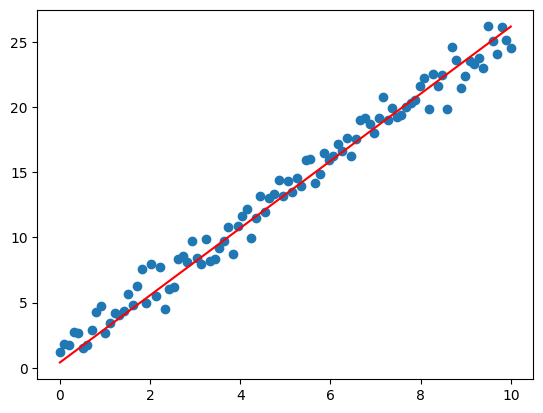

In [4]:
plt.figure()
plt.scatter(x, y, label="Data Points")
plt.plot(x, a_hat_BGD * x + b_hat_BGD, color="red", label=f"y = {a_hat}*x+{b_hat}")
plt.show()

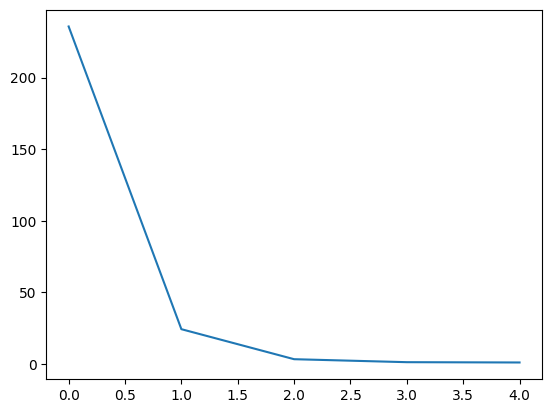

In [5]:
plt.figure()
plt.plot(lossi_BGD)
plt.show()

# 随机梯度下降法

在之前的实现中，算法每次计算梯度时都会对全部真实值和预测值进行计算

这样做有很多不足之处，首先是计算量很大。其次是梯度一直平滑的下降，到达梯度为 0 时就没办法继续优化了

我们可以考虑把数据随机批然后拟合，这样算力消耗会变少，而且引入了一些随机性，使得回归有可能跳出 0 梯度点使参数达到更优秀的效果

在下面的实现，SGD 算法每轮只取 30 条数据回归同样轮数就能达到 BGD 的效果

In [6]:
import random


def linear_fit_SGD(x: np.ndarray, y: np.ndarray, learning_rate: float = 0.01, eval_iters: int = 100, batch_size: int = 100):
    # 初始化参数
    a = 0.0
    b = 0.0
    n = len(x)
    lossi = []
    # 执行梯度下降
    for _ in range(eval_iters):
        ix = random.sample(range(100), batch_size)
        x_batch = x[ix]
        y_batch = y[ix]
        y_pred = a * x_batch + b
        # 计算损失 (MSE)
        loss = np.sum((y_pred - y_batch) ** 2) / n
        lossi.append(loss)
        # 计算梯度
        da = (2 / n) * np.sum((y_pred - y_batch) * x_batch)
        db = (2 / n) * np.sum(y_pred - y_batch)
        # 更新参数
        a -= learning_rate * da
        b -= learning_rate * db
    return a, b, lossi


a_hat_SGD, b_hat_SGD, lossi_SGD = linear_fit_SGD(x, y, 0.03, 5, 30)

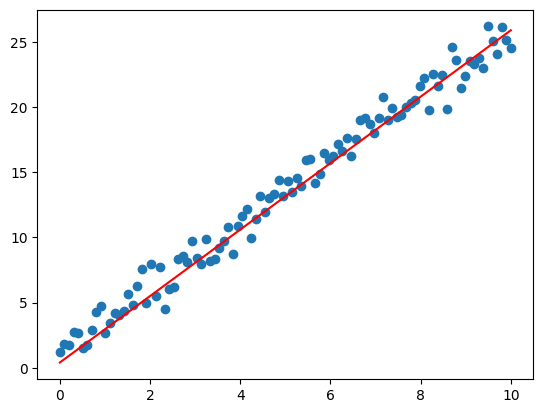

In [7]:
plt.figure()
plt.scatter(x, y, label="Data Points")
plt.plot(x, a_hat_SGD * x + b_hat_SGD, color="red", label=f"y = {a_hat}*x+{b_hat}")
plt.show()

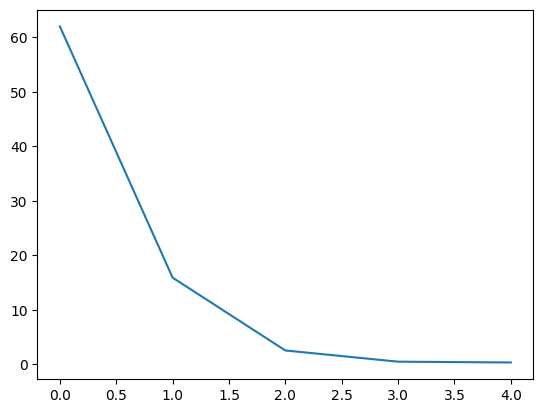

In [8]:
plt.figure()
plt.plot(lossi_SGD)
plt.show()

# 算法对比与选择建议

|算法|核心优势|主要缺陷|典型应用场景|
|----|----|----|----|
|BGD|更新稳定，理论分析简单|计算成本高，内存需求大|小规模数据或理论研究|
|SGD|计算高效，适合大规模数据|震荡明显，需精细调参|在线学习、简单模型训练|
|Mini-batch GD|平衡效率与稳定性，硬件加速友好|批量大小需手动选择|深度学习默认优化方式|
|Momentum|加速收敛，减少震荡|需调整动量系数|损失函数地形复杂（如“峡谷”）|
|Adagrad|自适应稀疏特征学习率|学习率过早衰减|NLP、推荐系统|
|RMSprop|动态调整学习率，适合非平稳目标|超参数敏感|RNN、非凸优化|
|Adam|综合性能强，超参数鲁棒性高|可能在某些任务中泛化性略差|深度学习通用优化|

~建议无脑Adam~